In [6]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)
print(boston.feature_names)
print(boston.DESCR)

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to 

In [7]:
boston_table = pd.DataFrame(boston.data)
boston_table.columns = boston.feature_names
boston_table['MEDV'] = boston.target
print(boston_table.head())
print(boston_table.describe())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    

(404, 13)
(102, 13)
(404,)
(102,)
Coefficients: [-1.30799852e-01  4.94030235e-02  1.09535045e-03  2.70536624e+00
 -1.59570504e+01  3.41397332e+00  1.11887670e-03 -1.49308124e+00
  3.64422378e-01 -1.31718155e-02 -9.52369666e-01  1.17492092e-02
 -5.94076089e-01]
Mean squared error: 20.869292183770522


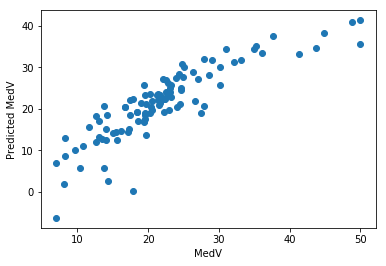

In [25]:
from sklearn.model_selection import train_test_split

# Y = Boston Housing Price; X = all other features
X = boston_table.drop(columns=['MEDV'])
Y = boston_table['MEDV']


X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 5)
print(X_train.shape)
print(X_test.shape) 
print(Y_train.shape) 
print(Y_test.shape) 

from sklearn.linear_model import LinearRegression

# Create linear regression object
# LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
linear_reg = LinearRegression()

# Train the model using the training sets
linear_reg.fit(X_train, Y_train)

# Make predictions using the testing set
Y_pred = linear_reg.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("MedV")
plt.ylabel("Predicted MedV")
# Plot outputs
# plt.plot(X_test, Y_pred, color='red',linewidth=3)

print('Coefficients:', linear_reg.coef_)

mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print('Mean squared error:', mse)

In [29]:
pd.DataFrame(list(zip(boston_table.columns, linear_reg.coef_)), columns=['feature', 'coefficient'])

,feature,coefficient
0,CRIM,-0.130800
1,ZN,0.049403
2,INDUS,0.001095
3,CHAS,2.705366
4,NOX,-15.957050
5,RM,3.413973
6,AGE,0.001119
7,DIS,-1.493081
8,RAD,0.364422
9,TAX,-0.013172


In [36]:
errors = {}
for feature in boston.feature_names:
    linear_reg = LinearRegression()
    linear_reg.fit(X[[feature]], Y)
    mean_squared_error = np.mean((Y - linear_reg.predict(X[[feature]])) ** 2)
    errors[feature] = mean_squared_error
errors = sorted(errors.items(), key=lambda x: x[1])
print("Features that Minimize Error")
print(30 * "-")
for e in errors:
    print(e[0], "\t", e[1])

Features that Minimize Error
------------------------------
LSTAT 	 38.48296722989416
RM 	 43.60055177116958
PTRATIO 	 62.65220001376927
INDUS 	 64.66622164107531
TAX 	 65.88727533683914
NOX 	 69.00428835540674
CRIM 	 71.69073588196666
RAD 	 72.12481188075273
AGE 	 72.42398092899347
ZN 	 73.4516960947557
B 	 75.03242920751906
DIS 	 79.14634158607113
CHAS 	 81.82651411931553


Coefficients: [-0.97981166]
Mean squared error: 38.82182901428658


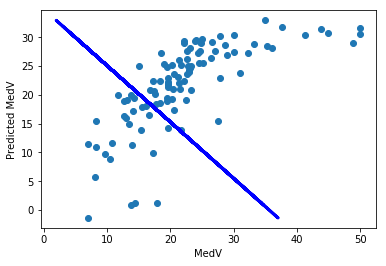

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Y = Boston Housing Price; X = LSTAT
X = boston_table.drop(columns=['MEDV','CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
 'B'])
Y = boston_table['MEDV']


X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 5)

# Create linear regression object
# LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
linear_reg = LinearRegression()

# Train the model using the training sets
linear_reg.fit(X_train, Y_train)

# Make predictions using the testing set
Y_pred = linear_reg.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("MedV")
plt.ylabel("Predicted MedV")

print('Coefficients:', linear_reg.coef_)
plt.plot(X_test, Y_pred, color='blue', linewidth=3)


mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print('Mean squared error:', mse)

Coefficients: [-34.53515511]
Mean squared error: 64.12228379419476


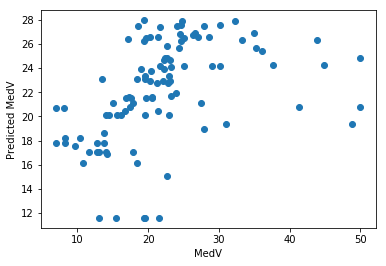

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Y = Boston Housing Price; X = NOX
X = boston_table.drop(columns=['MEDV','CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
 'B', 'LSTAT'])
Y = boston_table['MEDV']


X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 5)

# Create linear regression object
# LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
linear_reg = LinearRegression()

# Train the model using the training sets
linear_reg.fit(X_train, Y_train)

# Make predictions using the testing set
Y_pred = linear_reg.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("MedV")
plt.ylabel("Predicted MedV")


print('Coefficients:', linear_reg.coef_)

mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print('Mean squared error:', mse)

Coefficients: [5.95524316]
Mean squared error: 74.85865756754261


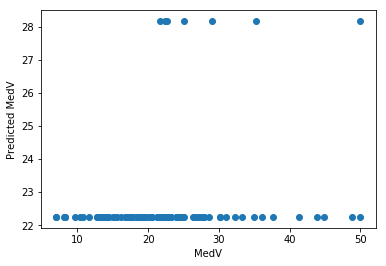

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Y = Boston Housing Price; X = CHAS
X = boston_table.drop(columns=['MEDV','CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
 'B', 'LSTAT'])
Y = boston_table['MEDV']


X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 5)

# Create linear regression object
# LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
linear_reg = LinearRegression()

# Train the model using the training sets
linear_reg.fit(X_train, Y_train)

# Make predictions using the testing set
Y_pred = linear_reg.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("MedV")
plt.ylabel("Predicted MedV")


print('Coefficients:', linear_reg.coef_)

mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print('Mean squared error:', mse)

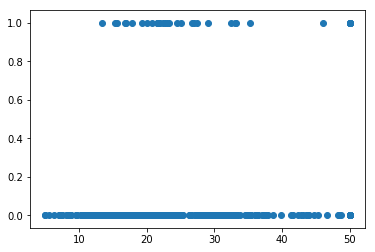

In [72]:
plt.scatter(boston_table.MEDV, boston_table.CHAS)